# WEA FOR NEUTRON SURVIVAL PROBABILITY CALCULATION 

## For solar neutrons through interplanetary space

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [8]:
def n_surv_prob(energy, attenuation, thickness):
    
    """Calculates de neutron survival probability through a given material. 
    Only interplanetary space and air are currently available.
    thickness is given in m"""

    # https://stackoverflow.com/questions/52390359/how-to-create-a-logarithmic-spaced-array-in-python
    # En = np.append(np.outer(np.logspace(1, 3, num = 3, base = 10), 
    #                         np.arange(1,10,1)).flatten(), 10000) #Enería en MeV
    
    m = 939.565560 #Masa en MeV/c**2
    c = 299792458 #Velocidad de la luz en m/s
    t = 886 #Vida media en s
    den = t*c*np.sqrt((((energy/m)+1)**2)-1) #Denominador de la ecuación
    Ps = np.exp(-(thickness/den))*attenuation*0.1

    return Ps

def plot_surv_plot(energy, surv_prob):

    """Plot calculation results"""
    
    fig = plt.figure(1, figsize=(12,25))
    gs = gridspec.GridSpec(4, 1) 
    ax1 = plt.subplot(gs[0])
    ax1.set_facecolor('gainsboro')
    
    plt.loglog(energy, surv_prob, marker = '*', ls = '--', lw = 1.5, 
               markersize = 10, color='crimson')
    # plt.axvspan(20, 200, color='crimson', alpha = 0.1 )
    
    ax1.tick_params(axis = 'both', which = 'both', direction = 'in', 
                labelsize = 23, color = 'k', width = 1.1, length = 5)
    ax1.set_xlabel('E$_{n}$ [MeV]', fontweight='bold',
           fontsize = 30, fontname = 'C059')
    ax1.set_ylabel('P$_{s}$(E$_{n}$)', fontweight='bold',
           fontsize = 30, fontname = 'C059')
    # ax1.set_ylim(1e-6, 2)
    
    plt.title(f'Survival probability \n for neutrons in the atmosphere', fontsize = 28,
          fontweight='bold', color = "black", fontname = 'C059')
    plt.grid(True, lw = 0.5, color = 'gray', ls = '-.', which = 'both')
    plt.legend(['Starting at 10 km'], loc='lower right', fontsize = 19, framealpha = 0.4) #, '3\u03C3'
    
    # plt.savefig('survprob', dpi = 'figure', bbox_inches= 'tight')
    plt.show()

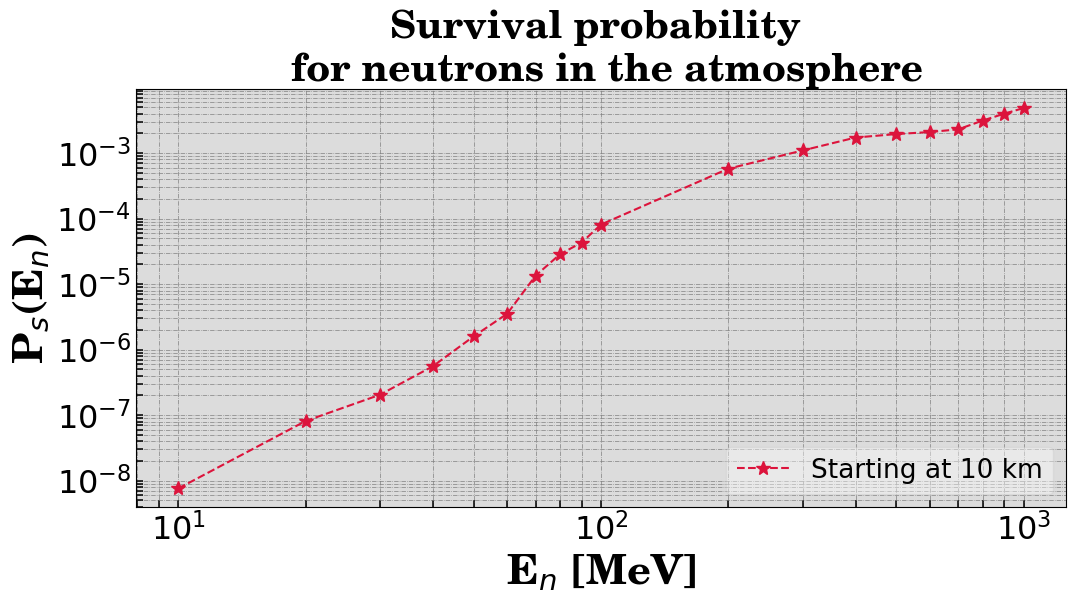

In [9]:
# M3.9 flare case (Monterde-Andrade_2023)
# Scattering cross section may be obtained though several calculations here:
# https://www.ncnr.nist.gov/resources/activation/

# From González-Méndez (2015)
att = pd.read_csv("Neutron_attenuation.csv", header = 0, engine = 'python')
Ps = n_surv_prob(att["Energía [MeV]"], att.Atenuación, thickness =1e11)

plot_surv_plot(att.iloc[:19, 0], Ps[:19])

In [7]:
att.iloc[:19, 0]

0       10
1       20
2       30
3       40
4       50
5       60
6       70
7       80
8       90
9      100
10     200
11     300
12     400
13     500
14     600
15     700
16     800
17     900
18    1000
Name: Energía [MeV], dtype: int64

In [2]:
En = np.linspace(1, 10000, num=10000) #Enería en MeV
R = 149597870700 #UA en m
m = 939.565560 #Masa en MeV/c**2
c = 299792458 #Velocidad de la luz en m/s
t = 886 #Vida media en s
den = t*c*np.sqrt((((En/m)+1)**2)-1) #Denominador de la ecuación
Ps = np.exp(-(R/den))

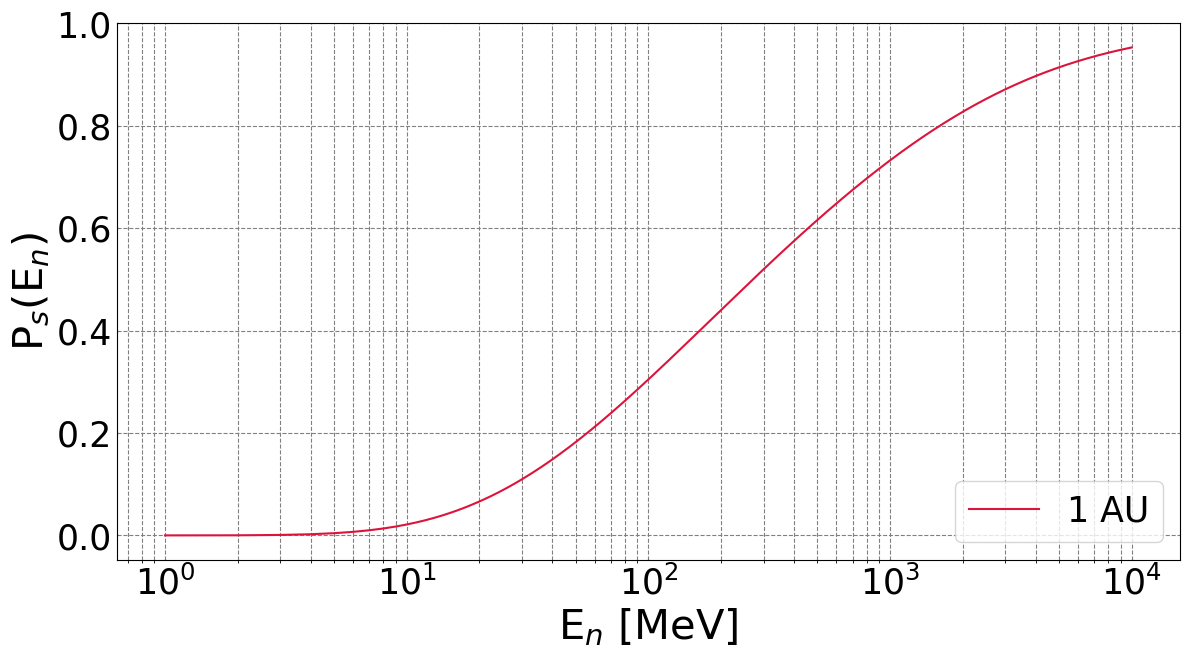

In [4]:
fig = plt.figure(1, figsize=(12,25))
gs = gridspec.GridSpec(4, 1) 
ax1 = plt.subplot(gs[0])

plt.semilogx(En, Ps, linestyle='-', color='crimson')#, label='data-set1')
# plt.semilogx(x_data, y_data+500, marker='s', markersize=10,mfc='white',
#             linestyle='--', label='data-set2')

ax1.tick_params(which = 'major', labelsize = 25, direction = 'in', length = 1, color = 'dimgray', width = 1) #axis = 'both', 
ax1.set_xlabel('E$_{n}$ [MeV]', fontsize = 30)
ax1.set_ylabel('P$_{s}$(E$_{n}$)', fontsize = 30, color= 'black')

# ax1.yaxis.grid(which="major", color='darkgray', linestyle='--', linewidth=1)
# ax1.xaxis.grid(which="major", color='darkgray', linestyle='--', linewidth=1)
plt.grid(True, which="both", color='gray', linestyle='--')
plt.legend(['1 AU'], loc='lower right', fontsize = 25) #, '3\u03C3'
# plt.legend()

fig.tight_layout()
# plt.savefig('survprob', dpi = 'figure', bbox_inches= 'tight')
plt.show()

## For secondary neutrons through Earth's atmosphere